[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.]


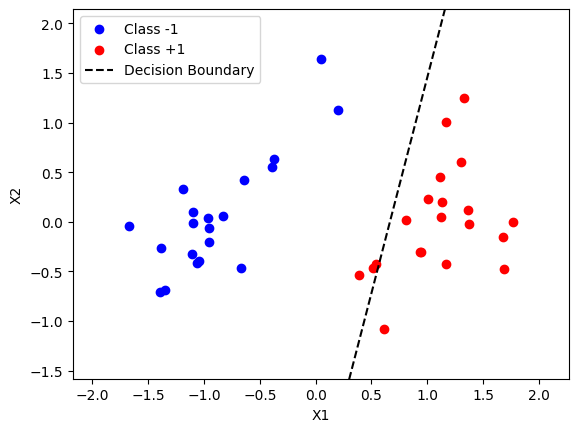

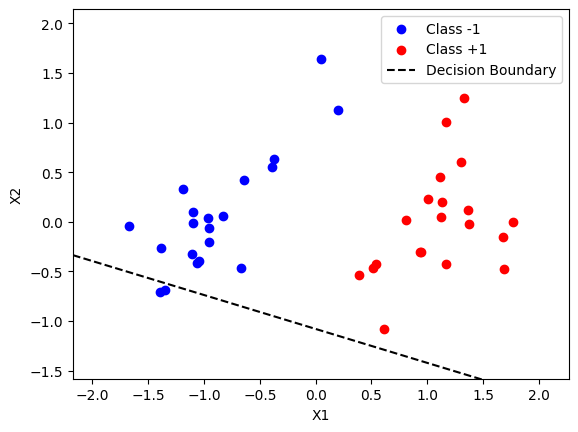

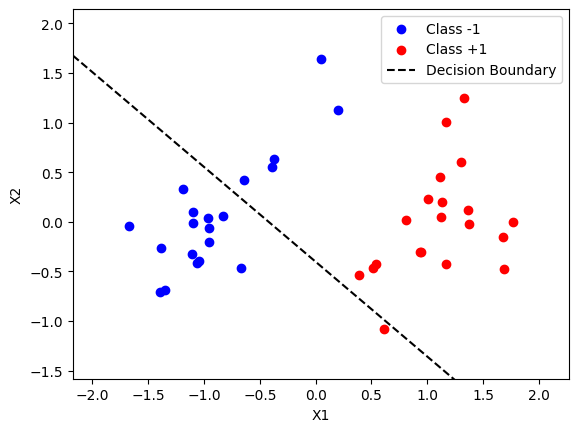

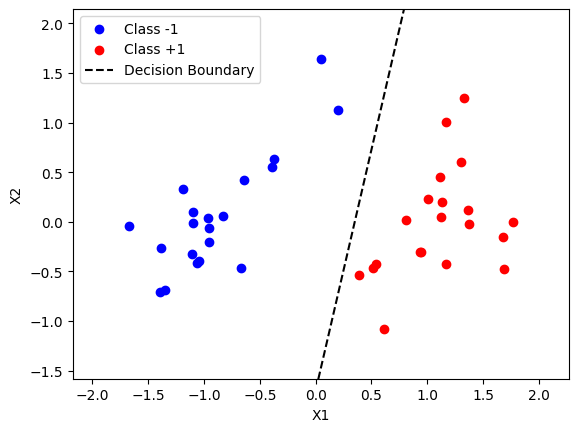

In [11]:
import numpy as np
from matplotlib import pyplot as plt


def predict(w, X):
    return np.sign(X.dot(w))


def plots(X0, X1, X, w, count):
    plt.figure(count)
    plt.scatter(X0[:, 0], X0[:, 1], color='b', label='Class -1')
    plt.scatter(X1[:, 0], X1[:, 1], color='r', label='Class +1')
    x_vals = np.array([np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5])
    y_vals = -(x_vals * w[1] + w[0]) / w[2]
    plt.plot(x_vals, y_vals, '--', color='k', label='Decision Boundary')
    plt.xlim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    plt.ylim(np.min(X[:, 2])-0.5, np.max(X[:, 2])+0.5)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()


def perceptron(X, y, w_init, X0, X1):
    w = w_init
    count = 1
    plots(X0, X1, X, w, count)
    while True:
        pred = predict(w, X)
        # find indexes of misclassified points
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # number of misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:  # no more misclassified points
            return w
        # randomly pick one misclassified point
        random_id = np.random.choice(mis_idxs, 1)[0]
        # update w
        w = w + y[random_id]*X[random_id]
        count += 1
        plots(X0, X1, X, w, count)


means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis=1)
w_init = np.random.randn(Xbar.shape[1])
print(predict(w_init,Xbar))
w = perceptron(Xbar, y, w_init, X0, X1)
